## Exploratory Data Analysis (EDA)

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [180]:
# Load data frame
df = pd.read_csv('petrochemical_maintenance.csv')
df.head()

,timestamp,equipment_id,vibration_x,vibration_y,vibration_z,temperature_c,current_a,rpm,pressure_bar,wavelet_feature_1,wavelet_feature_2,wavelet_feature_3,wavelet_feature_4,wavelet_feature_5,fault_type,maintenance_required
0,2025-08-12 10:00:21.509191,EQ-002,-0.001014,0.005853,-0.009354,74.260267,10.130073,2972.856137,4.828486,1.142983,-0.657425,0.419990,0.477962,-1.075043,no_fault,0
1,2025-08-12 10:00:31.509191,EQ-005,-0.028933,-0.006458,0.016110,62.646420,9.127524,3033.625211,4.465692,1.022921,2.650931,-0.815444,1.472578,0.327915,no_fault,0
2,2025-08-12 10:00:41.509191,EQ-003,0.243668,0.349136,0.202759,88.868460,12.769256,2753.482665,5.942975,0.211604,-2.128811,1.548664,0.634099,0.516687,bearing_fault,1
3,2025-08-12 10:00:51.509191,EQ-009,0.040973,0.032422,-0.003027,67.151677,10.622962,3077.578082,4.925685,0.889331,1.706350,0.988230,-1.594953,-1.194773,no_fault,0
4,2025-08-12 10:01:01.509191,EQ-007,0.039661,0.002196,0.006602,72.840428,11.431961,2960.856782,4.793623,-1.005365,-2.064017,0.410040,-0.865833,0.962551,no_fault,0


In [181]:
# Check rows and columns
df.shape

(5000, 16)

In [182]:
# Get data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             5000 non-null   object 
 1   equipment_id          5000 non-null   object 
 2   vibration_x           5000 non-null   float64
 3   vibration_y           5000 non-null   float64
 4   vibration_z           5000 non-null   float64
 5   temperature_c         5000 non-null   float64
 6   current_a             5000 non-null   float64
 7   rpm                   5000 non-null   float64
 8   pressure_bar          5000 non-null   float64
 9   wavelet_feature_1     5000 non-null   float64
 10  wavelet_feature_2     5000 non-null   float64
 11  wavelet_feature_3     5000 non-null   float64
 12  wavelet_feature_4     5000 non-null   float64
 13  wavelet_feature_5     5000 non-null   float64
 14  fault_type            5000 non-null   object 
 15  maintenance_required 

In [183]:
# Get statistics of numerical values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vibration_x,5000.0,0.062282,0.087444,-0.074409,-0.004813,0.018631,0.132800,0.373233
vibration_y,5000.0,0.062142,0.086996,-0.079232,-0.003731,0.018196,0.130318,0.365274
vibration_z,5000.0,0.061776,0.086654,-0.074427,-0.004573,0.019047,0.132723,0.363575
temperature_c,5000.0,76.001068,9.396747,53.406406,68.869254,74.060406,82.822620,110.790521
current_a,5000.0,11.950740,2.799776,6.752987,9.782357,10.891146,14.257743,20.748306
rpm,5000.0,2920.493629,120.699363,2522.785379,2834.785840,2958.352272,3010.739975,3161.131235
pressure_bar,5000.0,5.417371,0.773510,3.345714,4.863258,5.315433,5.896007,8.366381
wavelet_feature_1,5000.0,-0.017568,0.995384,-3.841926,-0.685239,-0.005531,0.652951,3.313657
wavelet_feature_2,5000.0,-0.005989,1.006752,-3.708700,-0.680994,-0.019370,0.679174,3.394122
wavelet_feature_3,5000.0,-0.010578,1.003449,-3.468916,-0.692082,-0.016875,0.657735,3.475239


In [184]:
# Check missing values
df.isna().sum()

timestamp               0
equipment_id            0
vibration_x             0
vibration_y             0
vibration_z             0
temperature_c           0
current_a               0
rpm                     0
pressure_bar            0
wavelet_feature_1       0
wavelet_feature_2       0
wavelet_feature_3       0
wavelet_feature_4       0
wavelet_feature_5       0
fault_type              0
maintenance_required    0
dtype: int64

In [185]:
# Check duplicates
def check_duplicate(df, subset):
    if subset is not None: 
        return df.duplicated(subset=subset, keep=False).sum()
    else:
        return df.duplicated(keep=False).sum()
    
check_duplicate(df, ['timestamp', 'equipment_id'])

0

Dataset has 5000 rows and 16 columns with no missing values and no duplicates

#### fault_type

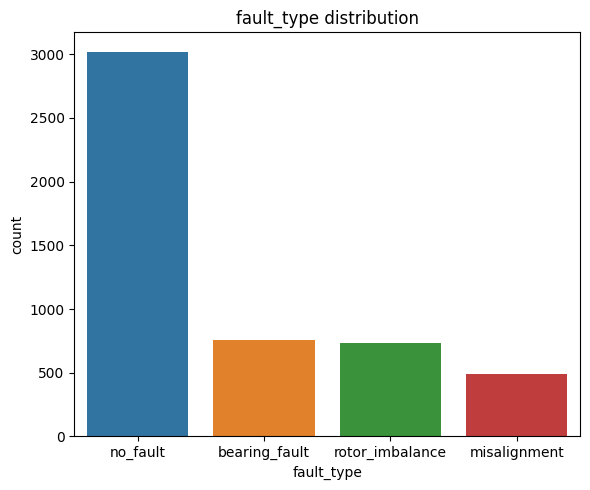

In [186]:
# Create the bar plot
plt.figure(figsize=(6, 5))

sns.countplot(df, x='fault_type').set(title='fault_type distribution', xlabel='fault_type')

plt.tight_layout()
plt.show()

no_fault has the highest count, followed by bearing_fault and rotor_imbalance while the lowest count is misalignment

#### maintenance_required

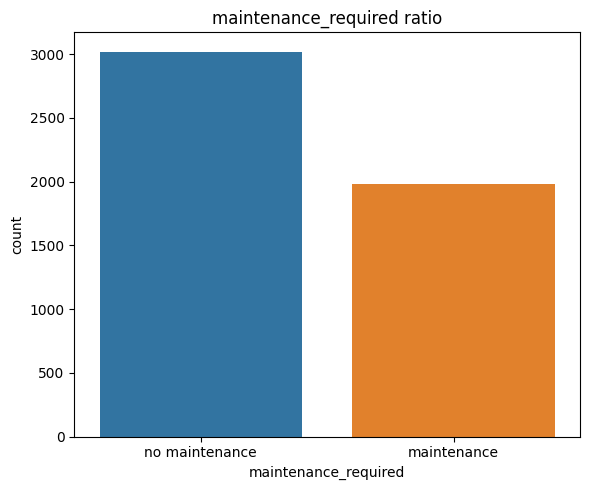

In [187]:
# Create the bar plot
plt.figure(figsize=(6, 5))

ax = sns.countplot(df, x='maintenance_required')
ax.set(title='maintenance_required ratio', xlabel='maintenance_required')
ax.set_xticklabels(['no maintenance', 'maintenance'])

plt.tight_layout()
plt.show()

This column is imbalanced, showing fewer data with maintenance required

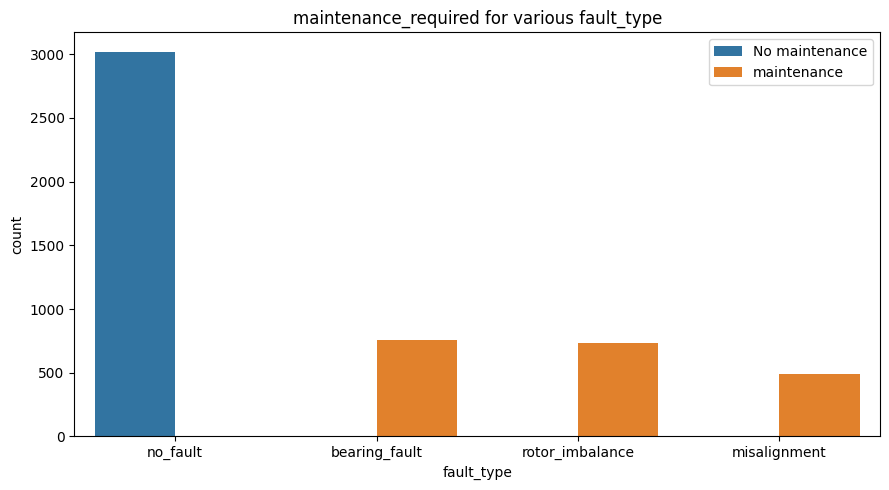

In [188]:
# Create the bar plot
plt.figure(figsize=(9, 5))

ax = sns.countplot(df, x='fault_type', hue='maintenance_required')
ax.set(title='maintenance_required for various fault_type', xlabel='fault_type')
ax.legend(labels = ['No maintenance', 'maintenance'])

plt.tight_layout()
plt.show()

There are 3 fault types that required maintenance, which are bearing_fault, rotor_imbalance, and misalignment. The no_fault still has the largest proportion among all of them

#### temperature

[Text(0.5, 1.0, 'temperature histogram')]

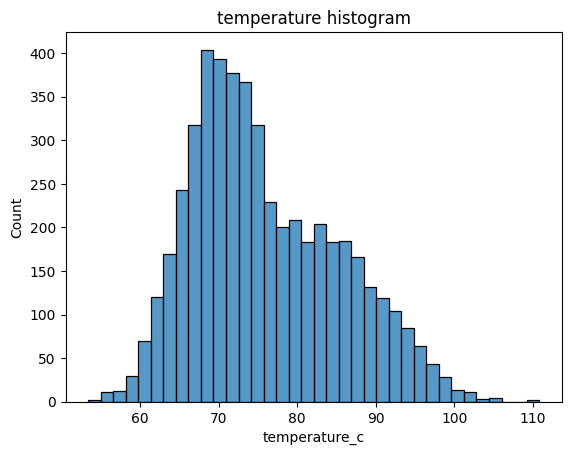

In [189]:
# Create the histogram plot
sns.histplot(df, x='temperature_c').set(title='temperature histogram')

In [190]:
# Get temperature statistics
df.temperature_c.describe()

count    5000.000000
mean       76.001068
std         9.396747
min        53.406406
25%        68.869254
50%        74.060406
75%        82.822620
max       110.790521
Name: temperature_c, dtype: float64

The average temperature is 76C, illustrating no unexpected spikes in the distribution

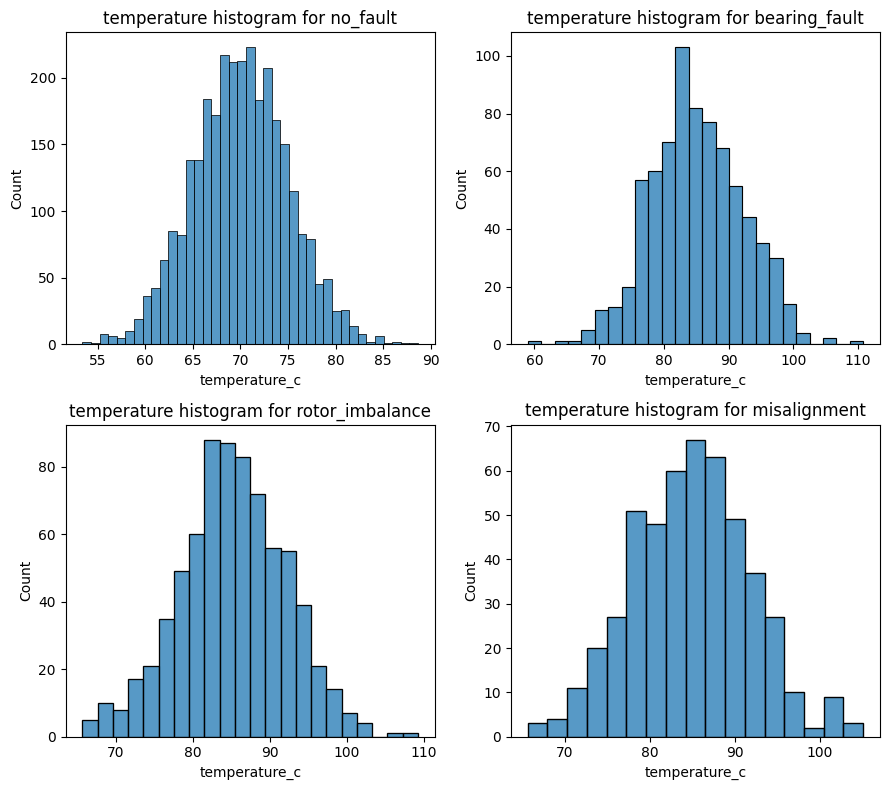

In [191]:
# Create the histogram plot for fault_type
fault_types = df['fault_type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(9, 8))
axes = axes.flatten()

for ax, fault_type in zip(axes, fault_types):
    sns.histplot(
        data=df[df['fault_type'] == fault_type],
        x='temperature_c',
        ax=ax
    )
    ax.set_title(f'temperature histogram for {fault_type}')

# Remove any unused subplots
for ax in axes[len(fault_types):]:
    ax.remove()

plt.tight_layout()
plt.show()

It seems that temperature has slightly arise (~80C) for bearing_fault, rotor_imabalance, and misalignment where maintenance is required

#### rpm

[Text(0.5, 1.0, 'rpm histogram')]

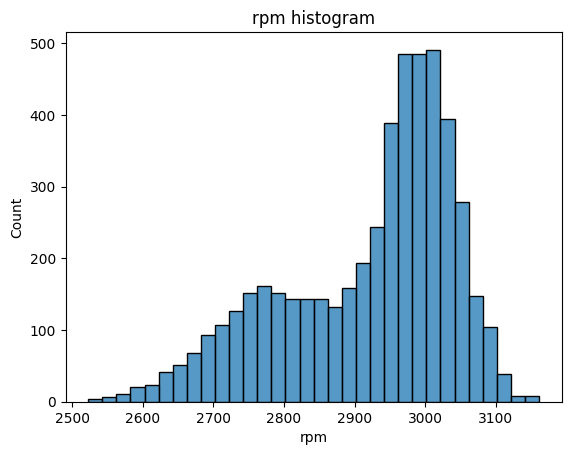

In [192]:
# Create the histogram plot
sns.histplot(df, x='rpm').set(title='rpm histogram')

In [193]:
# Get rpm statistics
df.rpm.describe()

count    5000.000000
mean     2920.493629
std       120.699363
min      2522.785379
25%      2834.785840
50%      2958.352272
75%      3010.739975
max      3161.131235
Name: rpm, dtype: float64

The rpm average is approximately 2920, while the lowest is about 2522

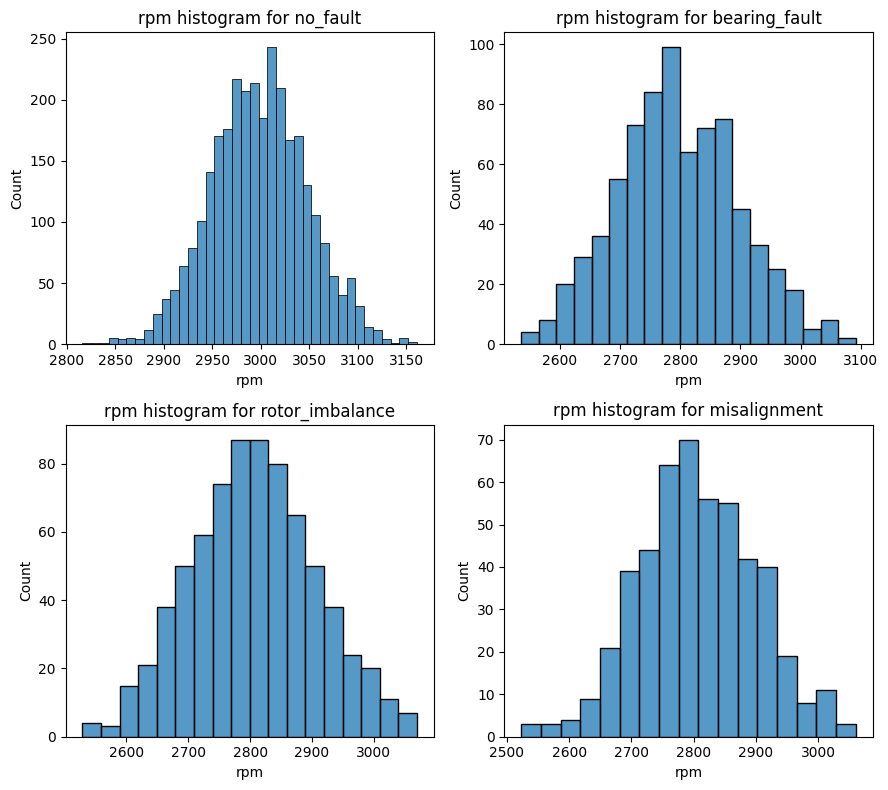

In [194]:
# Create the histogram plot for fault_type
fault_types = df['fault_type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(9, 8))
axes = axes.flatten()

for ax, fault_type in zip(axes, fault_types):
    sns.histplot(
        data=df[df['fault_type'] == fault_type],
        x='rpm',
        ax=ax
    )
    ax.set_title(f'rpm histogram for {fault_type}')

# Remove any unused subplots
for ax in axes[len(fault_types):]:
    ax.remove()

plt.tight_layout()
plt.show()

The average rpm is slightly lower for bearing_fault, rotor_imbalance, and misalignment (~2800) where maintenance is required. On the other hand, no_fault average shows approximately 3000

#### pressure_bar

[Text(0.5, 1.0, 'pressure_bar histogram')]

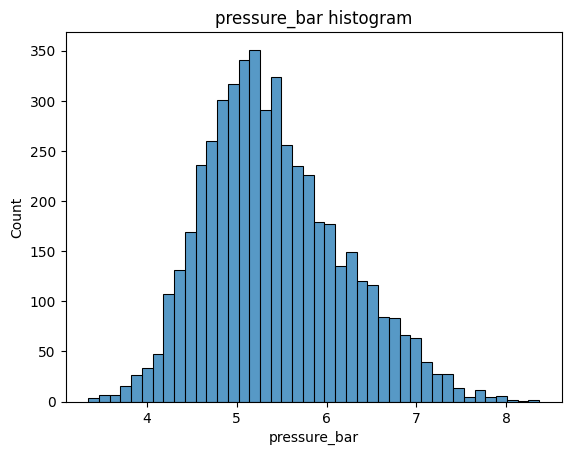

In [195]:
# Create the histogram plot
sns.histplot(df, x='pressure_bar').set(title='pressure_bar histogram')

In [196]:
# Get pressure_bar statistics
df.pressure_bar.describe()

count    5000.000000
mean        5.417371
std         0.773510
min         3.345714
25%         4.863258
50%         5.315433
75%         5.896007
max         8.366381
Name: pressure_bar, dtype: float64

The pressure bar ranges from 3 to 8 with average 5.4

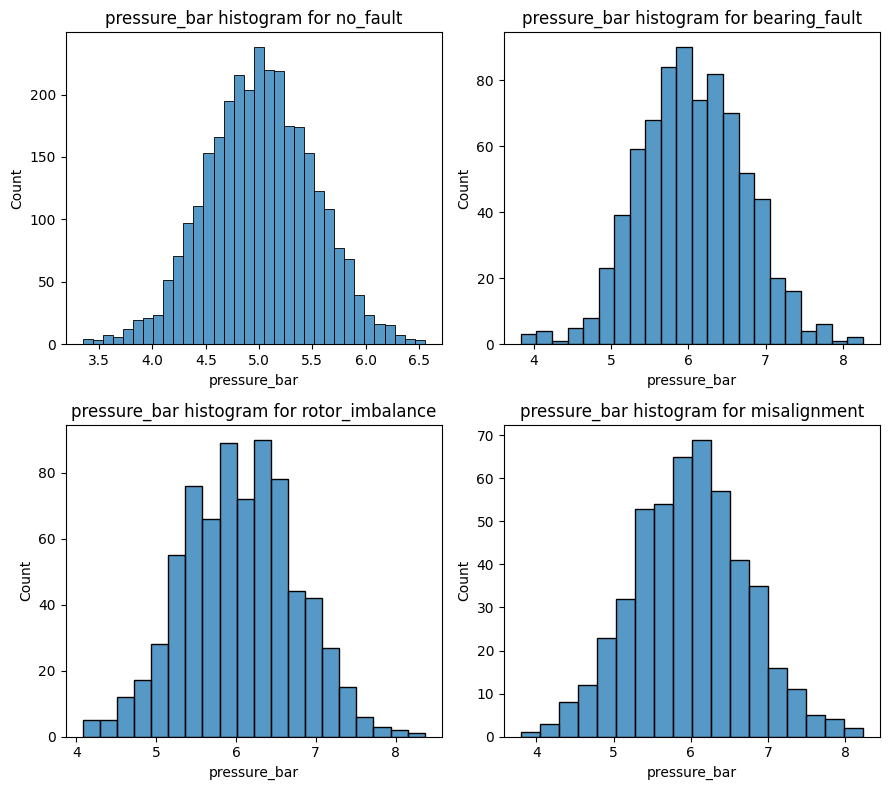

In [197]:
# Create the histogram plot for fault_type
fault_types = df['fault_type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(9, 8))
axes = axes.flatten()

for ax, fault_type in zip(axes, fault_types):
    sns.histplot(
        data=df[df['fault_type'] == fault_type],
        x='pressure_bar',
        ax=ax
    )
    ax.set_title(f'pressure_bar histogram for {fault_type}')

# Remove any unused subplots
for ax in axes[len(fault_types):]:
    ax.remove()

plt.tight_layout()
plt.show()

Nothing suspicious on the pressure bar distribution

#### current_a

[Text(0.5, 1.0, 'current_a histogram')]

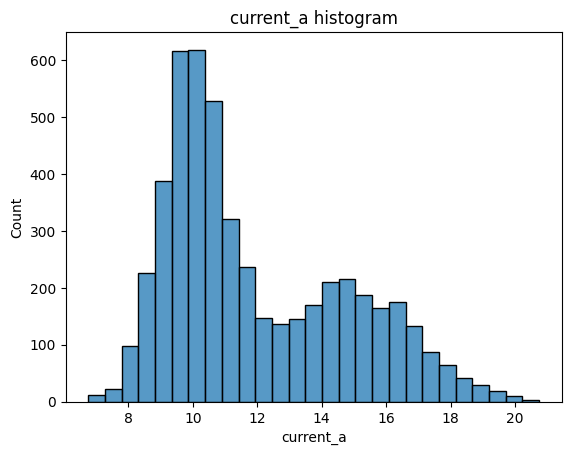

In [198]:
# Create the histogram plot
sns.histplot(df, x='current_a').set(title='current_a histogram')

In [199]:
# Get current_a statistics
df.current_a.describe()

count    5000.000000
mean       11.950740
std         2.799776
min         6.752987
25%         9.782357
50%        10.891146
75%        14.257743
max        20.748306
Name: current_a, dtype: float64

The average current a is 11.9 with minimum of 6 and max of 20

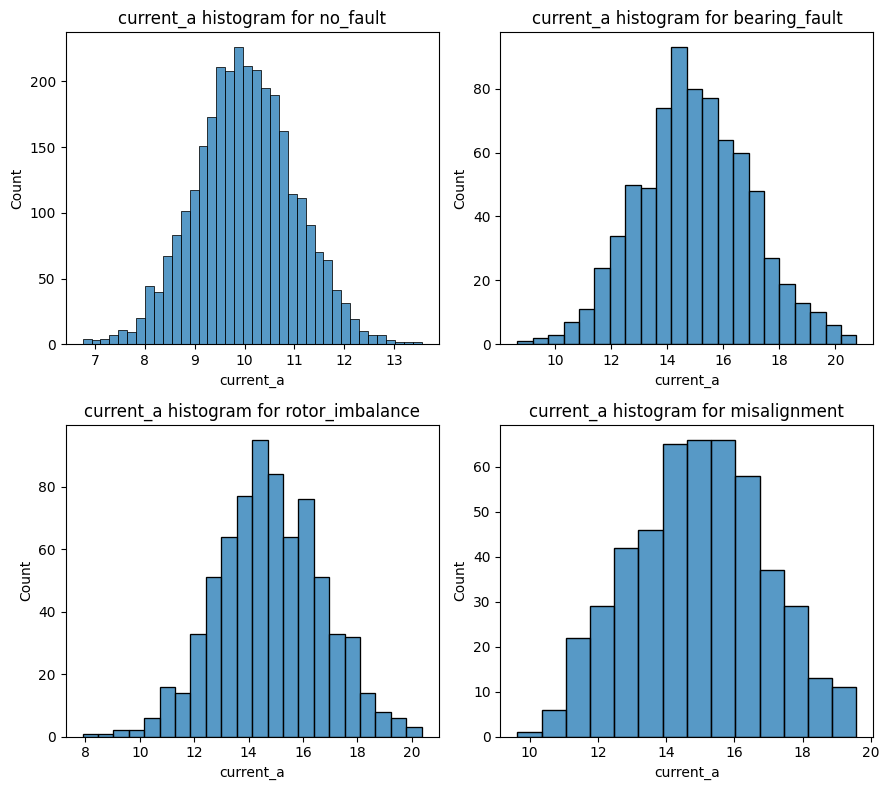

In [200]:
# Create the histogram plot for fault_type
fault_types = df['fault_type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(9, 8))
axes = axes.flatten()

for ax, fault_type in zip(axes, fault_types):
    sns.histplot(
        data=df[df['fault_type'] == fault_type],
        x='current_a',
        ax=ax
    )
    ax.set_title(f'current_a histogram for {fault_type}')

# Remove any unused subplots
for ax in axes[len(fault_types):]:
    ax.remove()

plt.tight_layout()
plt.show()

The current_a for bearing_fault, rotor_imbalance, and misalignment has higher average of current (~14) compared to no_fault (~10)

#### Correlation analysis

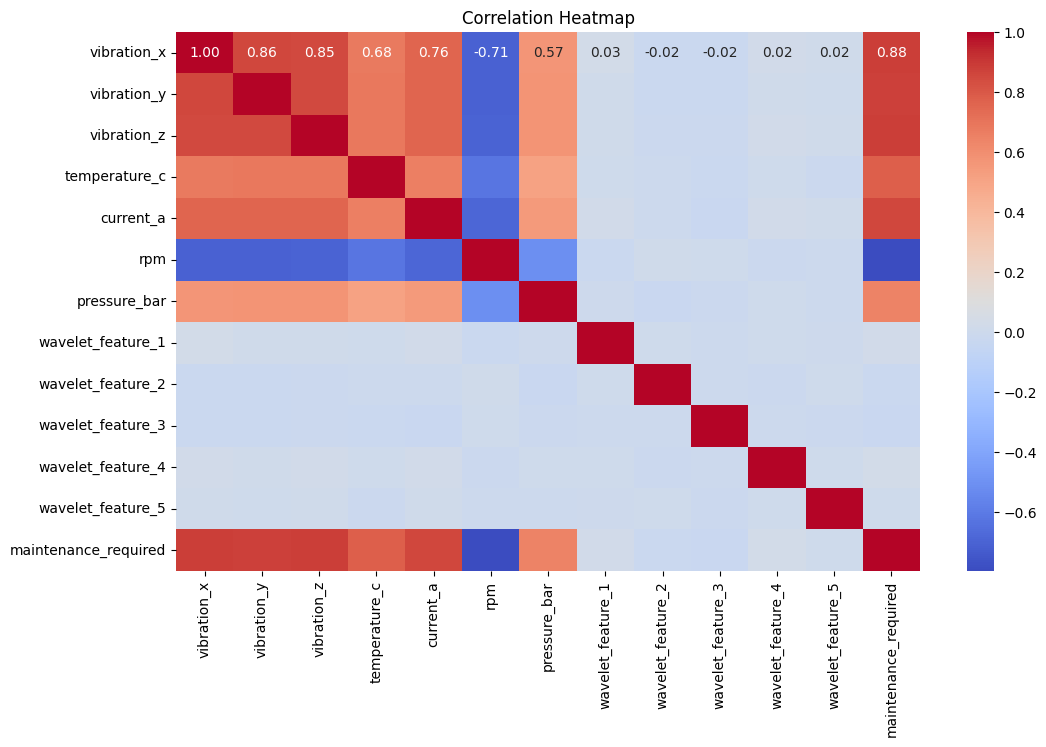

In [201]:
# Correlation heatmap
plt.figure(figsize=(12, 7))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Higher vibration, temperature, current, and pressure show higher chance of maintenance. In addition, low RPM shows higher chance of maintenance

## Encoding

In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
# Encoding the fault_type column
le = LabelEncoder()
df['fault_type'] = le.fit_transform(df['fault_type'])

# Count values
df['fault_type'].value_counts()

fault_type
2    3021
0     755
3     733
1     491
Name: count, dtype: int64

## Model Building and Feature Prediction

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [205]:
# Set features and target columns
X = df.drop(['timestamp', 'equipment_id', 'fault_type'], axis=1)
y = df['fault_type']

In [206]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [207]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [208]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.904
Confusion Matrix:
 [[130   3   0  33]
 [  0  65   0  19]
 [  0   0 612   0]
 [ 25  16   0  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       166
           1       0.77      0.77      0.77        84
           2       1.00      1.00      1.00       612
           3       0.65      0.70      0.68       138

    accuracy                           0.90      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.91      0.90      0.90      1000



#### K-Nearest Neighbors (KNN)

In [209]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate model
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.856
Confusion Matrix:
 [[115   7   0  44]
 [  2  60   0  22]
 [  0   0 612   0]
 [ 42  27   0  69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71       166
           1       0.64      0.71      0.67        84
           2       1.00      1.00      1.00       612
           3       0.51      0.50      0.51       138

    accuracy                           0.86      1000
   macro avg       0.72      0.73      0.72      1000
weighted avg       0.86      0.86      0.86      1000



#### Support Vector Machine (SVM)

In [210]:
# Train model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.9
Confusion Matrix:
 [[122   3   0  41]
 [  0  66   0  18]
 [  0   0 612   0]
 [ 22  16   0 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       166
           1       0.78      0.79      0.78        84
           2       1.00      1.00      1.00       612
           3       0.63      0.72      0.67       138

    accuracy                           0.90      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.90      0.90      0.90      1000



#### Random Forest

In [211]:
# Train model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest
Accuracy: 0.896
Confusion Matrix:
 [[129   3   0  34]
 [  0  63   0  21]
 [  0   0 612   0]
 [ 26  20   0  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       166
           1       0.73      0.75      0.74        84
           2       1.00      1.00      1.00       612
           3       0.63      0.67      0.65       138

    accuracy                           0.90      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.90      0.90      0.90      1000



It seems that logistic regression has the highest accuracy compared to other models

#### Feature importance

In [212]:
# Get feature importance from logistic regression coefficients
importance = log_reg.coef_[0]

# Organize the importance
feature_names = X.columns

# Create a pandas series
feat_importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances (Coefficients):")
print(feat_importances)

Feature Importances (Coefficients):
vibration_z             6.728717
vibration_y             6.535043
vibration_x             6.218733
temperature_c           0.699865
pressure_bar            0.630908
current_a               0.522520
wavelet_feature_4       0.446320
wavelet_feature_5       0.374737
maintenance_required    0.099114
wavelet_feature_3      -0.058564
wavelet_feature_1      -0.273733
wavelet_feature_2      -0.456523
rpm                    -0.960929
dtype: float64


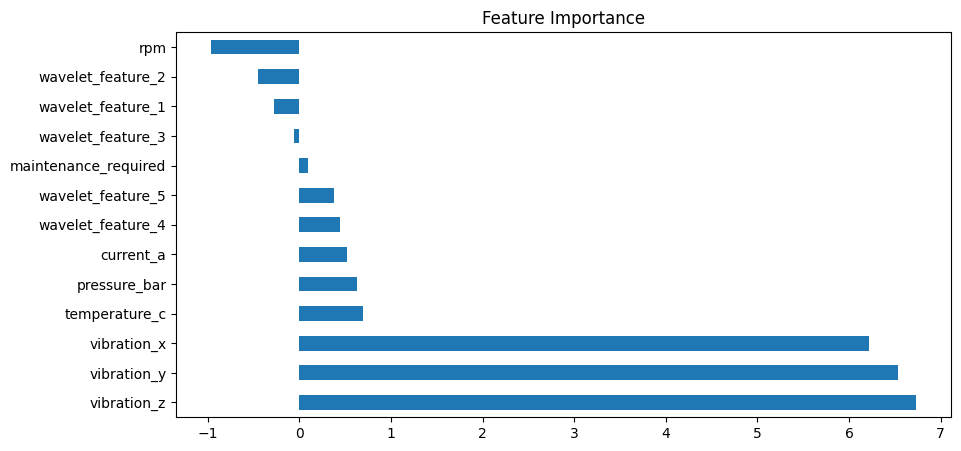

In [213]:
# Plot the feature importances
plt.figure(figsize=(10, 5))
feat_importances.plot(kind='barh', title='Feature Importance')
plt.show()

Vibrartions show primary fault indicators that required maintenance and rpm illustrates strong inverse indicator

#### Save the model

In [214]:
import joblib

In [ ]:
# Save the logistic regression model
joblib.dump(log_reg, 'log_reg_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the encoder
joblib.dump(le, 'fault_type_label_encoder.pkl')

# Save the feature order
feature_order = list(X.columns)
joblib.dump(feature_order, 'feature_order.pkl')

['feature_order.pkl']

In [217]:
# Check the saved model
model = joblib.load('log_reg_model.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('fault_type_label_encoder.pkl')
feature_order = joblib.load('feature_order.pkl')

print(model)
print(feature_order)
print(encoder.classes_)

LogisticRegression()
['vibration_x', 'vibration_y', 'vibration_z', 'temperature_c', 'current_a', 'rpm', 'pressure_bar', 'wavelet_feature_1', 'wavelet_feature_2', 'wavelet_feature_3', 'wavelet_feature_4', 'wavelet_feature_5', 'maintenance_required']
['bearing_fault' 'misalignment' 'no_fault' 'rotor_imbalance']
